In [1]:
import pandas as pd
import numpy as np 

#visalization 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys  
sys.path.insert(0, '../Scripts')

import plots 

In [3]:
data = pd.read_csv('../data/Train.csv')
data 

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,tour_993,UAE,45-64,Alone,0.0,1.0,Business,Hunting tourism,"Friends, relatives",Independent,...,No,No,No,No,2.0,0.0,Credit Card,No,No comments,3315000.0
4805,tour_994,UNITED STATES OF AMERICA,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,11.0,0.0,Cash,Yes,Friendly People,10690875.0
4806,tour_995,NETHERLANDS,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,others,Independent,...,No,No,No,No,3.0,7.0,Cash,Yes,Good service,2246636.7
4807,tour_997,SOUTH AFRICA,25-44,Friends/Relatives,1.0,1.0,Business,Beach tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,5.0,0.0,Credit Card,No,Friendly People,1160250.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [5]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The  dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(data)

The  dataset contains 1.3 % missing values.


In [6]:
data.isna().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

missing values: 
travel with replace with alone,
mostimpressing -> nocomment, 
total_male and female replace with 0

In [7]:
def fill_null(df,col,val):
    df[col] = df[col].fillna(val)


In [8]:
fill_null(data,'total_male',0)
fill_null(data,'total_female',0)
fill_null(data,'most_impressing','No comments')
fill_null(data,'travel_with','Alone')

NON - GRAPHICAL UNIVARIATE EXPLORATION


which country has the higest number of visitors

In [9]:
data['country'].unique()

array(['SWIZERLAND', 'UNITED KINGDOM', 'CHINA', 'SOUTH AFRICA',
       'UNITED STATES OF AMERICA', 'NIGERIA', 'INDIA', 'BRAZIL', 'CANADA',
       'MALT', 'MOZAMBIQUE', 'RWANDA', 'AUSTRIA', 'MYANMAR', 'GERMANY',
       'KENYA', 'ALGERIA', 'IRELAND', 'DENMARK', 'SPAIN', 'FRANCE',
       'ITALY', 'EGYPT', 'QATAR', 'MALAWI', 'JAPAN', 'SWEDEN',
       'NETHERLANDS', 'UAE', 'UGANDA', 'AUSTRALIA', 'YEMEN',
       'NEW ZEALAND', 'BELGIUM', 'NORWAY', 'ZIMBABWE', 'ZAMBIA', 'CONGO',
       'BURGARIA', 'PAKISTAN', 'GREECE', 'MAURITIUS', 'DRC', 'OMAN',
       'PORTUGAL', 'KOREA', 'SWAZILAND', 'TUNISIA', 'KUWAIT', 'DOMINICA',
       'ISRAEL', 'FINLAND', 'CZECH REPUBLIC', 'UKRAIN', 'ETHIOPIA',
       'BURUNDI', 'SCOTLAND', 'RUSSIA', 'GHANA', 'NIGER', 'MALAYSIA',
       'COLOMBIA', 'LUXEMBOURG', 'NEPAL', 'POLAND', 'SINGAPORE',
       'LITHUANIA', 'HUNGARY', 'INDONESIA', 'TURKEY', 'TRINIDAD TOBACCO',
       'IRAQ', 'SLOVENIA', 'UNITED ARAB EMIRATES', 'COMORO', 'SRI LANKA',
       'IRAN', 'MONTENEGRO', 

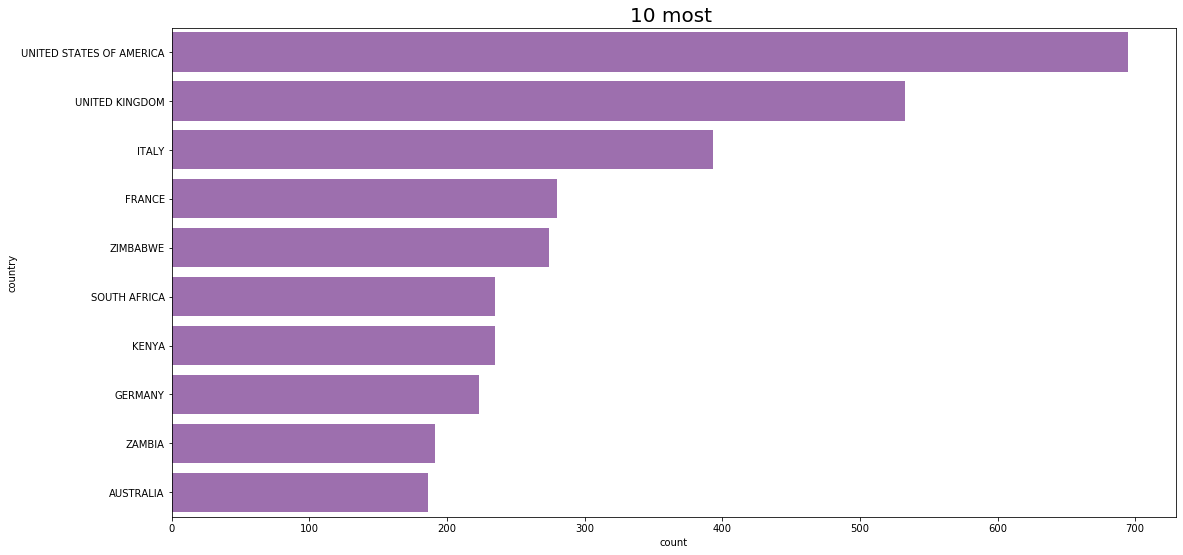

In [10]:
plots.count(data,'country','10 most ')

Age group of people visiting 

In [11]:
data['age_group'].value_counts()

25-44    2487
45-64    1391
1-24      624
65+       307
Name: age_group, dtype: int64

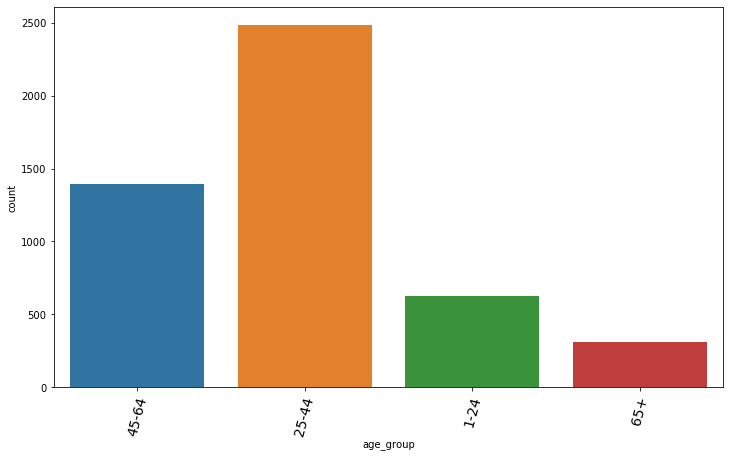

In [12]:
plots.plot_count(data,'age_group','')

plot 

Most poplar traveling purpose 


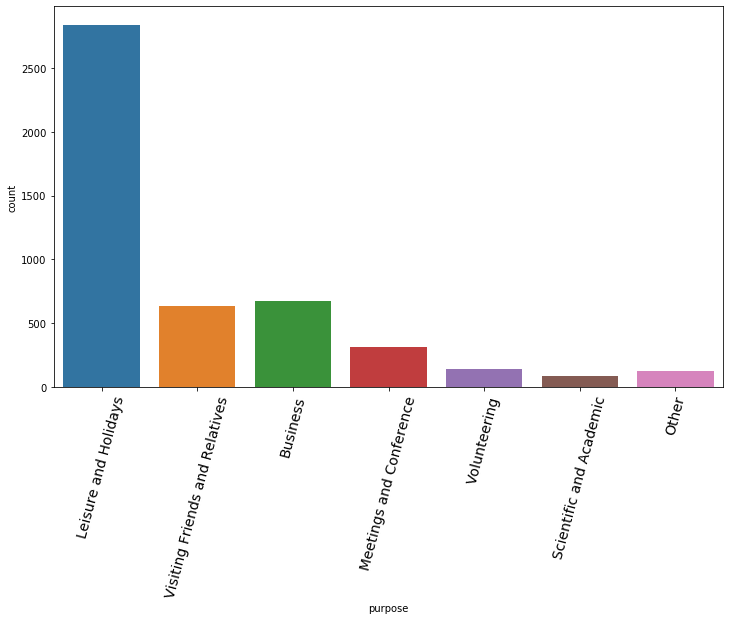

In [13]:
plots.plot_count(data,'purpose','')

people traveling with family and alone


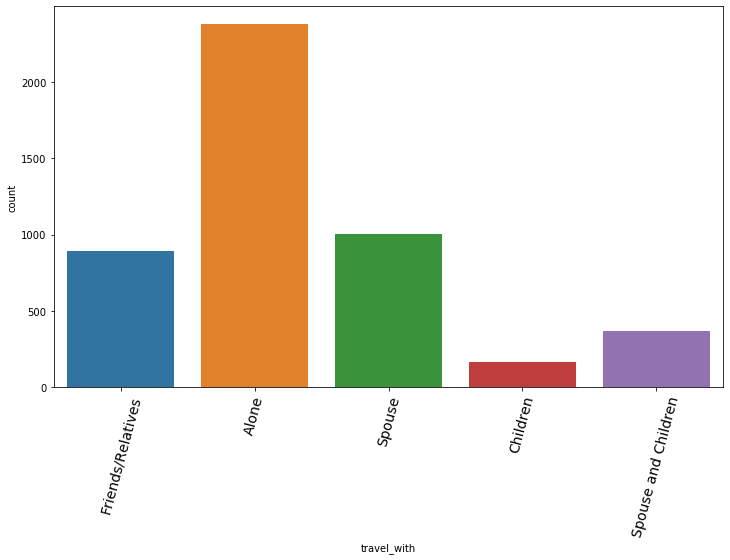

In [14]:
plots.plot_count(data,'travel_with','')

how many came with tours n travel companies

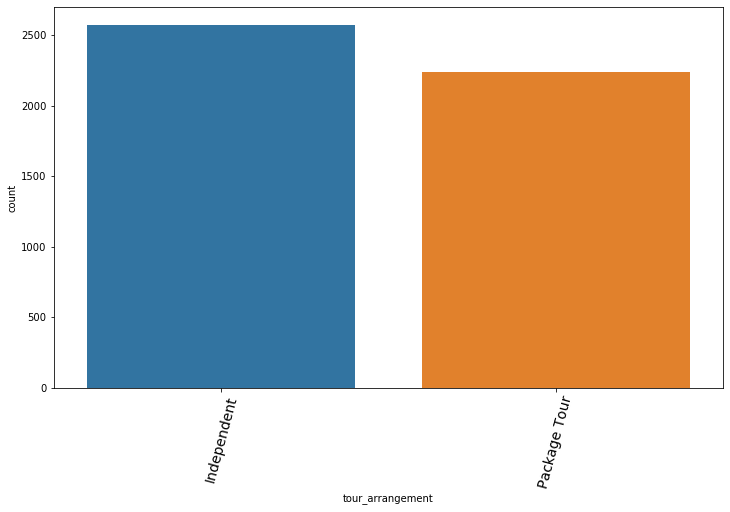

In [15]:
plots.plot_count(data,'tour_arrangement','')

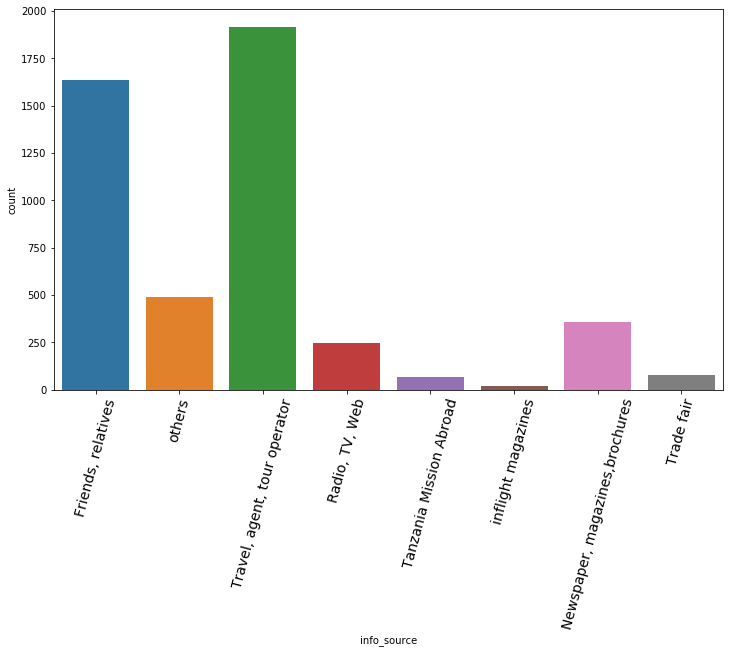

In [16]:
plots.plot_count(data,'info_source','')

In [17]:
purpose=data.groupby('info_source', as_index=False).agg({"total_cost": "sum"}).sort_values('total_cost', ascending= True)[:10]
purpose

,info_source,total_cost
6,inflight magazines,4.490408e+07
3,Tanzania Mission Abroad,2.137088e+08
4,Trade fair,5.198807e+08
2,"Radio, TV, Web",1.581531e+09
7,others,2.217139e+09
1,"Newspaper, magazines,brochures",2.292694e+09
0,"Friends, relatives",7.047421e+09
5,"Travel, agent, tour operator",2.510482e+10


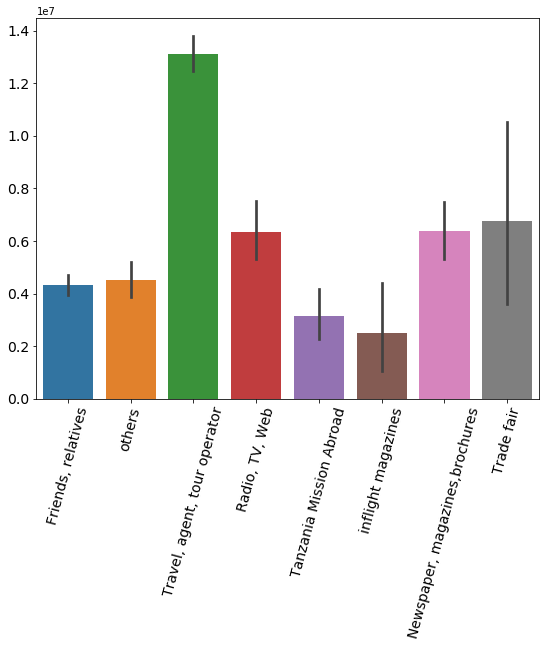

In [18]:
plots.plot_bar(data,'info_source','total_cost','','','')

age group spending most

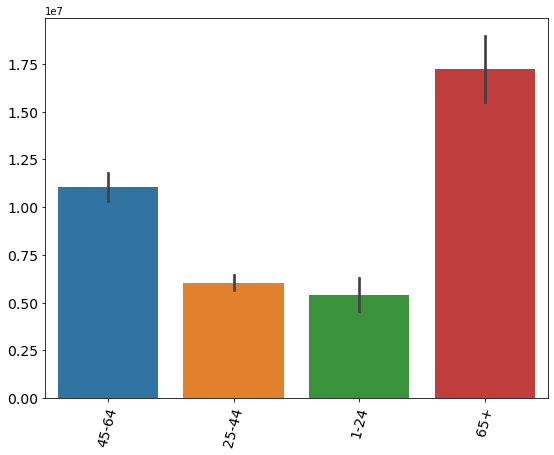

In [19]:
plots.plot_bar(data,'age_group','total_cost','','','')

In [20]:
Data = ['UNITED STATES OF AMERICA','UNITED KINGDOM','FRANCE',
       'ITALY','KENYA','SOUTH AFRICA','GERMANY','ZAMBIA','AUSTRALIA','ZIMBABWE']
top3 = data.loc[data['country'].isin(Data)]
top3.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
1,tour_10,UNITED KINGDOM,25-44,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
5,tour_1005,UNITED KINGDOM,25-44,Alone,0.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,No,Yes,Yes,No,9.0,3.0,Cash,Yes,Wildlife,120950.0
6,tour_1007,SOUTH AFRICA,45-64,Alone,0.0,1.0,Business,Mountain climbing,"Friends, relatives",Independent,...,No,No,No,No,9.0,0.0,Cash,Yes,Friendly People,466140.0


In [21]:
top = top3.groupby(['country'])['travel_with'].value_counts().groupby(level=0).head(10)#total expenditre
top

country                   travel_with        
AUSTRALIA                 Alone                   92
                          Spouse                  63
                          Friends/Relatives       26
                          Spouse and Children      3
                          Children                 2
FRANCE                    Spouse                  95
                          Spouse and Children     65
                          Alone                   59
                          Friends/Relatives       46
                          Children                15
GERMANY                   Alone                   73
                          Spouse                  60
                          Friends/Relatives       46
                          Spouse and Children     32
                          Children                12
ITALY                     Spouse                 159
                          Friends/Relatives      103
                          Alone                   67


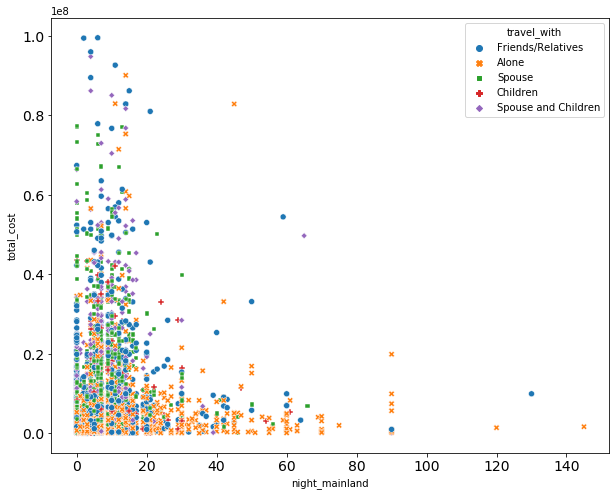

In [22]:
plots.plot_scatter(data,'night_mainland','total_cost','','travel_with','travel_with')



In [23]:
expenditure_purpose=data.groupby('purpose', as_index=False).agg({"total_cost": "sum"}).sort_values('total_cost', ascending= False)[:10]
expenditure_purpose

,purpose,total_cost
1,Leisure and Holidays,3.394122e+10
5,Visiting Friends and Relatives,2.019761e+09
0,Business,1.196016e+09
2,Meetings and Conference,7.653371e+08
6,Volunteering,5.451779e+08
4,Scientific and Academic,3.507831e+08
3,Other,2.037958e+08


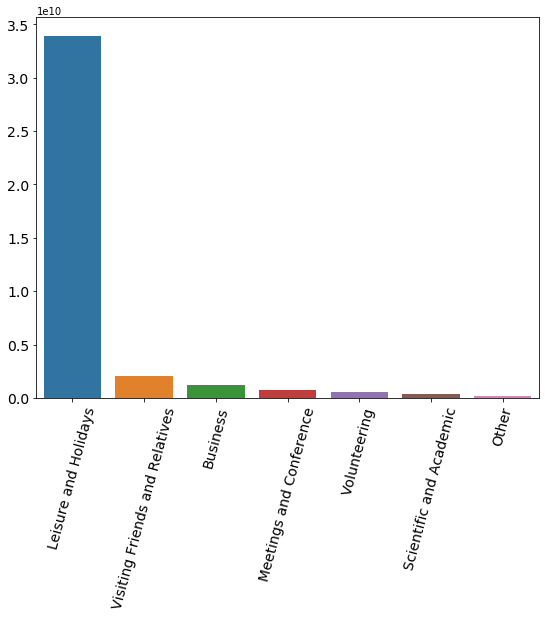

In [24]:
plots.plot_bar(expenditure_purpose,'purpose','total_cost','','','')

In [25]:
expenditure=data.groupby('travel_with', as_index=False).agg({"total_cost": "sum"}).sort_values('total_cost', ascending= False)[:10]
expenditure

,travel_with,total_cost
3,Spouse,1.274631e+10
2,Friends/Relatives,9.158700e+09
0,Alone,8.717835e+09
4,Spouse and Children,6.745753e+09
1,Children,1.653502e+09


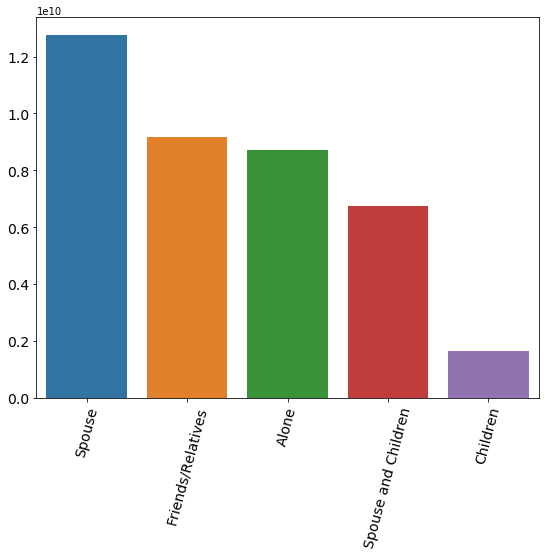

In [26]:
plots.plot_bar(expenditure,'travel_with','total_cost','','','')

In [27]:
agegroup_tour = data.groupby(['age_group','tour_arrangement']).agg({'tour_arrangement':'count','total_cost':'sum'}).sort_values('age_group', ascending= True)
agegroup_tour

tour_arrangement    total_cost
age_group tour_arrangement                                
1-24      Independent                    358  9.216790e+08
          Package Tour                   266  2.457409e+09
25-44     Independent                   1547  3.965686e+09
          Package Tour                   940  1.102141e+10
45-64     Independent                    604  1.916076e+09
          Package Tour                   787  1.345576e+10
65+       Independent                     61  2.914642e+08
          Package Tour                   246  4.992604e+09

In [28]:
spending_travelwith = data.groupby(['age_group','travel_with']).agg({'total_cost':'sum'}).sort_values('age_group',ascending= True)
spending_travelwith


total_cost
age_group travel_with                      
1-24      Alone                1.514977e+09
          Children             1.373354e+07
          Friends/Relatives    1.387789e+09
          Spouse               2.243549e+08
          Spouse and Children  2.382334e+08
25-44     Spouse               4.763236e+09
          Friends/Relatives    4.350254e+09
          Spouse and Children  1.982554e+09
          Alone                3.497563e+09
          Children             3.934924e+08
45-64     Alone                2.595812e+09
          Children             1.093086e+09
          Friends/Relatives    2.648244e+09
          Spouse               4.644731e+09
          Spouse and Children  4.389966e+09
65+       Spouse               3.113983e+09
          Alone                1.109483e+09
          Children             1.531898e+08
          Friends/Relatives    7.724125e+08
          Spouse and Children  1.349995e+08

In [29]:
gender = data.groupby(['age_group']).agg({'total_male':'sum','total_female':'sum'}).sort_values('age_group',ascending= True)
gender

,total_male,total_female
age_group,,
1-24,485.0,586.0
25-44,2476.0,2084.0
45-64,1589.0,1476.0
65+,300.0,308.0


In [30]:
gender = data.groupby(['age_group','travel_with']).agg({'total_male':'sum','total_female':'sum'}).sort_values('age_group',ascending= True)
gender

total_male  total_female
age_group travel_with                                  
1-24      Alone                     193.0         236.0
          Children                    3.0           7.0
          Friends/Relatives         224.0         273.0
          Spouse                     41.0          42.0
          Spouse and Children        24.0          28.0
25-44     Spouse                    485.0         486.0
          Friends/Relatives         734.0         764.0
          Spouse and Children       254.0         249.0
          Alone                     873.0         461.0
          Children                  130.0         124.0
45-64     Alone                     360.0         231.0
          Children                  107.0         118.0
          Friends/Relatives         386.0         350.0
          Spouse                    335.0         336.0
          Spouse and Children       401.0         441.0
65+       Spouse                    144.0         154.0
          Alone                      49.0          54.0
          Children                   14.0          11.0
          Friends/Relatives          80.0          76.0
          Spouse and Children        13.0          13.0

In [31]:
churn = data.groupby(['age_group','first_trip_tz']).agg({'total_cost':'sum'}).sort_values('age_group',ascending= True)
churn

total_cost
age_group first_trip_tz              
1-24      No             4.301421e+08
          Yes            2.948946e+09
25-44     No             2.597575e+09
          Yes            1.238953e+10
45-64     No             2.819452e+09
          Yes            1.255239e+10
65+       No             4.758200e+08
          Yes            4.808248e+09

In [32]:
chur = data.groupby(['age_group','first_trip_tz','most_impressing']).agg({'most_impressing':'count'}).sort_values('age_group',ascending= True)
chur

most_impressing
age_group first_trip_tz most_impressing                                      
1-24      No             Wildlife                                          21
          Yes           Wonderful Country, Landscape, Nature               77
                        Satisfies and Hope Come Back                        1
                        No comments                                       100
                        Friendly People                                   144
                        Excellent Experience                               23
                        Good service                                       58
          No            Wonderful Country, Landscape, Nature               10
                        No comments                                        36
                        Good service                                       14
                        Friendly People                                    34
                        Excellent Experience                                8
          Yes            Wildlife                                          98
25-44     Yes           Excellent Experience                               86
                        Satisfies and Hope Come Back                       13
                        No comments                                       312
                        Good service                                      125
                        Friendly People                                   460
                         Wildlife                                         401
                        Wonderful Country, Landscape, Nature              200
          No            Satisfies and Hope Come Back                        3
                        No comments                                       293
                        Good service                                       64
                        Friendly People                                   305
                        Excellent Experience                               48
                         Wildlife                                         110
                        Wonderful Country, Landscape, Nature               67
45-64     Yes           Wonderful Country, Landscape, Nature               99
                        Satisfies and Hope Come Back                        8
                        No comments                                       134
                        Good service                                       61
                        Excellent Experience                               62
                         Wildlife                                         240
                        Friendly People                                   296
          No            Satisfies and Hope Come Back                        5
                        No comments                                       146
                        Good service                                       28
                        Friendly People                                   192
                        Excellent Experience                               29
                         Wildlife                                          61
                        Wonderful Country, Landscape, Nature               30
65+       Yes           Good service                                       12
                        Friendly People                                    87
                        Excellent Experience                               13
                         Wildlife                                          93
          No            Wonderful Country, Landscape, Nature                6
                        Friendly People                                    23
                        No comments                                        13
                        Good service                                        3
                        Excellent Experience                                2
      

In [33]:
data

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,tour_993,UAE,45-64,Alone,0.0,1.0,Business,Hunting tourism,"Friends, relatives",Independent,...,No,No,No,No,2.0,0.0,Credit Card,No,No comments,3315000.0
4805,tour_994,UNITED STATES OF AMERICA,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,11.0,0.0,Cash,Yes,Friendly People,10690875.0
4806,tour_995,NETHERLANDS,1-24,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,others,Independent,...,No,No,No,No,3.0,7.0,Cash,Yes,Good service,2246636.7
4807,tour_997,SOUTH AFRICA,25-44,Friends/Relatives,1.0,1.0,Business,Beach tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,5.0,0.0,Credit Card,No,Friendly People,1160250.0


In [34]:
def convert_yes_no(df,colname:str):
    df[colname].replace(['No','Yes'],[0,1],inplace=True)

In [35]:
def convert(df,colname:str,val:str,val2:str,res,res2):
    df[colname].replace([val,val2],[res,res2],inplace=True)

In [36]:
data

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,tour_993,UAE,45-64,Alone,0.0,1.0,Business,Hunting tourism,"Friends, relatives",Independent,...,No,No,No,No,2.0,0.0,Credit Card,No,No comments,3315000.0
4805,tour_994,UNITED STATES OF AMERICA,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,11.0,0.0,Cash,Yes,Friendly People,10690875.0
4806,tour_995,NETHERLANDS,1-24,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,others,Independent,...,No,No,No,No,3.0,7.0,Cash,Yes,Good service,2246636.7
4807,tour_997,SOUTH AFRICA,25-44,Friends/Relatives,1.0,1.0,Business,Beach tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,5.0,0.0,Credit Card,No,Friendly People,1160250.0


In [37]:
convert_yes_no(data,'package_guided_tour')
convert_yes_no(data,'package_insurance')
convert_yes_no(data,'first_trip_tz')
convert_yes_no(data,'package_transport_int')
convert_yes_no(data,'package_accomodation')
convert_yes_no(data,'package_food')
convert_yes_no(data,'package_transport_tz')
convert_yes_no(data,'package_sightseeing')

In [38]:
data['tour_arrangement'].replace(['Independent','Package Tour'],[0,1],inplace=True)

In [39]:
data

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",0,...,0,0,0,0,13.0,0.0,Cash,0,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,others,0,...,0,0,0,0,14.0,7.0,Cash,1,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",0,...,0,0,0,0,1.0,31.0,Cash,0,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",1,...,1,1,1,0,11.0,0.0,Cash,1,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",0,...,0,0,0,0,7.0,4.0,Cash,1,No comments,1657500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,tour_993,UAE,45-64,Alone,0.0,1.0,Business,Hunting tourism,"Friends, relatives",0,...,0,0,0,0,2.0,0.0,Credit Card,0,No comments,3315000.0
4805,tour_994,UNITED STATES OF AMERICA,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",1,...,1,1,1,1,11.0,0.0,Cash,1,Friendly People,10690875.0
4806,tour_995,NETHERLANDS,1-24,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,others,0,...,0,0,0,0,3.0,7.0,Cash,1,Good service,2246636.7
4807,tour_997,SOUTH AFRICA,25-44,Friends/Relatives,1.0,1.0,Business,Beach tourism,"Travel, agent, tour operator",0,...,0,0,0,0,5.0,0.0,Credit Card,0,Friendly People,1160250.0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            4809 non-null   object 
 4   total_female           4809 non-null   float64
 5   total_male             4809 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   int64  
 10  package_transport_int  4809 non-null   int64  
 11  package_accomodation   4809 non-null   int64  
 12  package_food           4809 non-null   int64  
 13  package_transport_tz   4809 non-null   int64  
 14  package_sightseeing    4809 non-null   int64  
 15  pack

In [46]:
data['info_source'].unique()

array(['Friends, relatives', 'others', 'Travel, agent, tour operator',
       'Radio, TV, Web', 'Tanzania Mission Abroad', 'inflight magazines',
       'Newspaper, magazines,brochures', 'Trade fair'], dtype=object)

Heatmap


top 15 features with highest correlation with sales


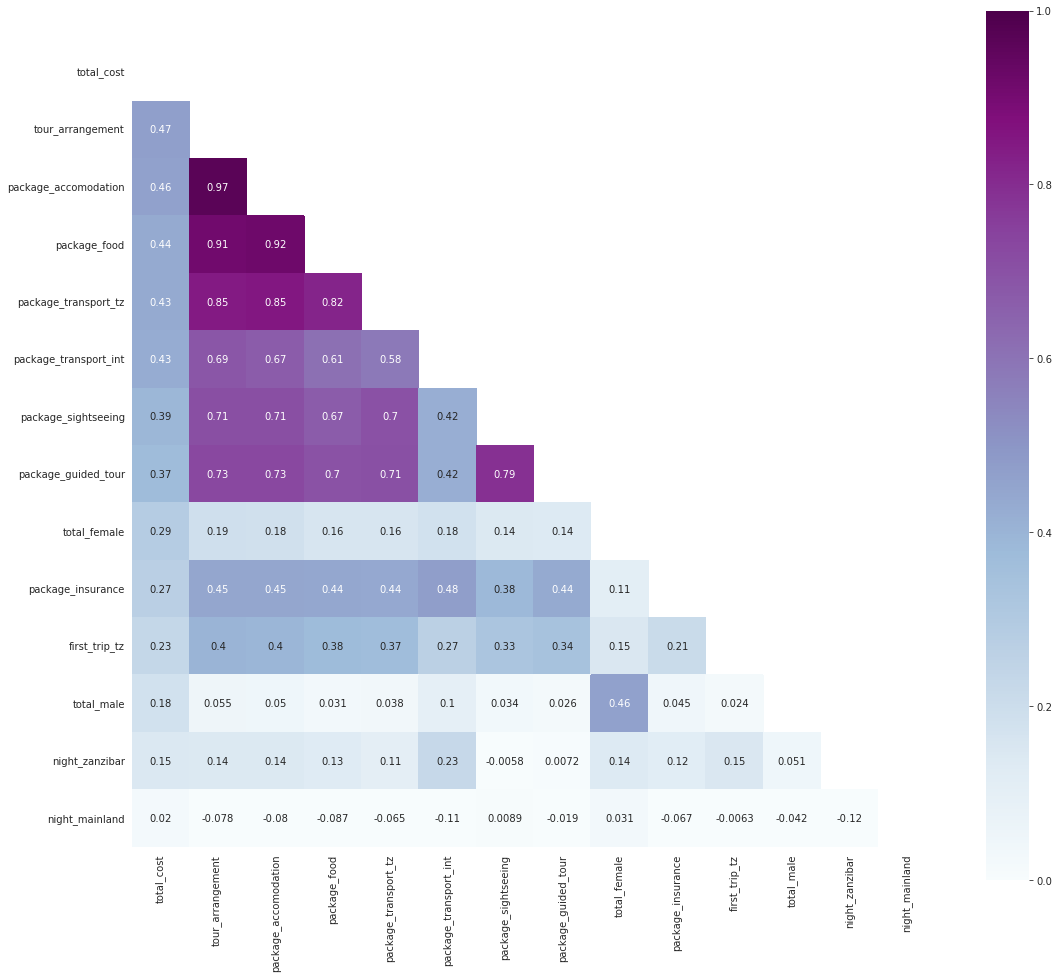

In [42]:
def correlation_map(f_data, f_feature, f_number):
    f_most_correlated = f_data.corr().nlargest(f_number,f_feature)[f_feature].index
    f_correlation = f_data[f_most_correlated].corr()
    
    f_mask = np.zeros_like(f_correlation)
    f_mask[np.triu_indices_from(f_mask)] = True
    with sns.axes_style("white"):
        f_fig, f_ax = plt.subplots(figsize=(18, 16))
        f_ax = sns.heatmap(f_correlation, mask=f_mask, vmin=0, vmax=1, square=True,
                           annot=True, annot_kws={"size": 10}, cmap="BuPu")
        f_fig.savefig('heatmap.svg', format='svg', dpi=1200)

    plt.show()

print('top 15 features with highest correlation with sales')
correlation_map(data, 'total_cost', 22)